<a href="https://colab.research.google.com/github/aksharat/DeloitteProjects/blob/master/Intro/Simple_model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt

cfg = dict()
cfg={'numEpoch' : 40}

inputs = torch.tensor([[0.], [0.5], [1.], [2.], [4.],[6.],[10.],[15.],[20.],[24.],[28.],[30.],[35.],[36.],[40.]])
targets = torch.tensor([[2.], [4.], [6.], [19.], [39.],[59.],[99.],[149.],[199.],[239.],[279.],[299.],[349.],[359.],[399.]])
df1 = pd.DataFrame(index=range(cfg['numEpoch']),columns=('epoch', 'loss'))

class MyNet(nn.Module):
    def __init__(self, n_hidden=14):
        super(MyNet, self).__init__()

        self.fc1 = nn.Linear(1, n_hidden)
        self.fc2 = nn.Linear(n_hidden, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = MyNet()
# def train(inputs, targets, net, epochs=350, lr=0.000510249):
optimizer = optim.SGD(net.parameters(), lr=0.0000110249, momentum=0.9)
criterion = nn.MSELoss()

epochs = 500
batch_size = len(inputs)

for epoch in range(epochs):

  running_loss = 0.0

  # model output
  outputs = net(inputs)

  # compute loss
  loss = criterion(outputs, targets)

  # backprop and update
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  running_loss += loss.detach().numpy()
  running_loss /= batch_size
  #print(running_loss)
  # print(f"Epoch {epoch}: loss = {loss.item()}")
  df1.loc[epoch] = [epoch, running_loss]
#print(df1)



In [ ]:
df1['loss']

0      3092.397656
1      2909.597656
2      2572.947656
3      2099.841276
4      1494.008594
          ...     
495       0.067082
496       0.066996
497        0.06691
498       0.066824
499       0.066738
Name: loss, Length: 500, dtype: object

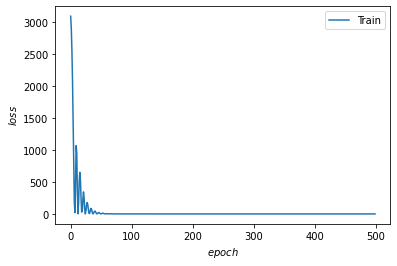

In [ ]:
#---plot the evolution

plt.plot(df1['epoch'],df1['loss'],label="Train")

plt.legend()
plt.xlabel(r'$epoch$')
plt.ylabel(r'$loss$')
plt.show()

In [ ]:
net.eval()
with torch.no_grad():
  for i in range(len(inputs)):
    print(f'f({inputs[i].item()}) = {net(inputs[i]).item():.2f} & target = {targets[i].item():.0f}')

f(0.0) = 2.21 & target = 2
f(0.5) = 5.30 & target = 4
f(1.0) = 9.52 & target = 6
f(2.0) = 19.31 & target = 19
f(4.0) = 39.40 & target = 39
f(6.0) = 59.48 & target = 59
f(10.0) = 99.39 & target = 99
f(15.0) = 149.28 & target = 149
f(20.0) = 199.17 & target = 199
f(24.0) = 239.09 & target = 239
f(28.0) = 279.00 & target = 279
f(30.0) = 298.96 & target = 299
f(35.0) = 348.85 & target = 349
f(36.0) = 358.83 & target = 359
f(40.0) = 398.74 & target = 399
